# Image Classification MNIST

## Summary
- download data from keras 

### Credits to:
- https://elitedatascience.com/keras-tutorial-deep-learning-in-python#step-4

## Prerequesites

### Convolutional Neural Networks
Convolutional Neural Networks (CNN's) are multi-layer neural networks (sometims up to 17 layers) that assume the input data to be images.    
CNNs can drastically reduce the number of parameters that needed to be tuned. 
![](data/typical_cnn_architecture.png)

Hidden layers = can learn increasingly abstract representations of the input data

## Setup dependencies

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras import backend as k_back
k_back.set_image_dim_ordering('tf')

from matplotlib import pyplot as plt

np.random.seed(123)

Using TensorFlow backend.
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


## Download Data

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

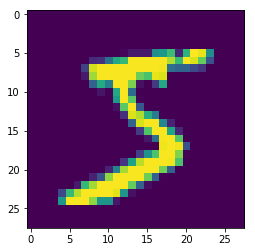

In [4]:
plt.imshow(X_train[0])

## Preprocess input data

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
# normalize float values between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]
# problem here is that labels are represented as single array

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## Setup model

In [16]:
model = Sequential()
model.add(Convolution2D(32,3,3, activation='relu', input_shape=(28,28,1))) #depth, width, height
model.add(Convolution2D(32,3,3, activation='relu'))
# reduce number of parameters in out model by sliding a 2x2 pooling filter 
# across the previous layer and taking the max of the 4 values in the 2x2 filter
model.add(MaxPooling2D(pool_size=(2,2))) 
# method for regularizing our model to prevent overfitting
# TODO: Fix dropout bug
# model.add(Dropout(0.25))

model.add(Flatten())
# Dense layer, first parameter is the output size of the layer
model.add(Dense(128, activation='relu'))
# TODO: Fix dropout bug
# model.add(Dropout(0.5))
# final laayer output 
model.add(Dense(10, activation='softmax'))
model.output_shape


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


(None, 10)

## Compile model

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## Fit model

In [18]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=32, verbose=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 46s 766us/step - loss: 0.1176 - acc: 0.9639
Epoch 2/10
60000/60000 [==============================] - 45s 750us/step - loss: 0.0399 - acc: 0.9871
Epoch 3/10
60000/60000 [==============================] - 45s 745us/step - loss: 0.0238 - acc: 0.9915
Epoch 4/10
60000/60000 [==============================] - 46s 765us/step - loss: 0.0159 - acc: 0.9949
Epoch 5/10
60000/60000 [==============================] - 46s 761us/step - loss: 0.0131 - acc: 0.9957
Epoch 6/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.0111 - acc: 0.9962
Epoch 7/10
60000/60000 [==============================] - 45s 758us/step - loss: 0.0075 - acc: 0.9974
Epoch 8/10
60000/60000 [==============================] - 46s 761us/step - loss: 0.0061 - acc: 0.9980
Epoch 9/10
60000/60000 [==============================] - 45s 756us/step - loss: 0.0052 - acc: 0.9983
Epoch 10/10
60000/60000 [==============================] - 45s 757us/step - loss: 

## Evaluate model

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


acc: 98.97%
